In [71]:
import numpy as np
import pandas as pd

***Dataframe***

In [72]:
samples = 10000
num_features = 2
features = np.random.rand(samples, num_features)
classes = np.random.choice(['d', 'c'], size=samples)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
classes_numeric = label_encoder.fit_transform(classes)
df = pd.DataFrame({'Feature 1': features[:, 0], 'Feature 2': features[:, 1], 'Class': classes_numeric})


***Split the data into training and testing sets***


In [73]:
from sklearn.model_selection import train_test_split
X = df[['Feature 1', 'Feature 2']]
y = df['Class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 2)
(2000, 2)
(8000,)
(2000,)


***Decision Tree***

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)


0.5065


***Bagging ensemble***

In [76]:
num_of_decisiontree = 10
decision_trees = []
for _ in range(num_of_decisiontree):
    index = np.random.choice(len(X_train), len(X_train), replace=True)
    X_sample = X_train.iloc[index]
    y_sample = y_train.iloc[index]
    
    decision_tree = DecisionTreeClassifier(random_state=42)
    decision_tree.fit(X_sample, y_sample)
    decision_trees.append(decision_tree)

***Predict***

In [77]:
predictions = []
for tree in decision_trees:
    prediction = tree.predict(X_test)
    predictions.append(prediction)

final_pred = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)
accuracy = accuracy_score(y_test, final_pred)
print("Bagging Accuracy:", accuracy)

Bagging Accuracy: 0.5065


### Implementation on Breast cancer dataset

In [78]:

from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
feature=bc.feature_names
target=bc.target_names
target

array(['malignant', 'benign'], dtype='<U9')

In [79]:
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9473684210526315


***Visualizasion of Decision Tree***

Take help from Towardsdatascience

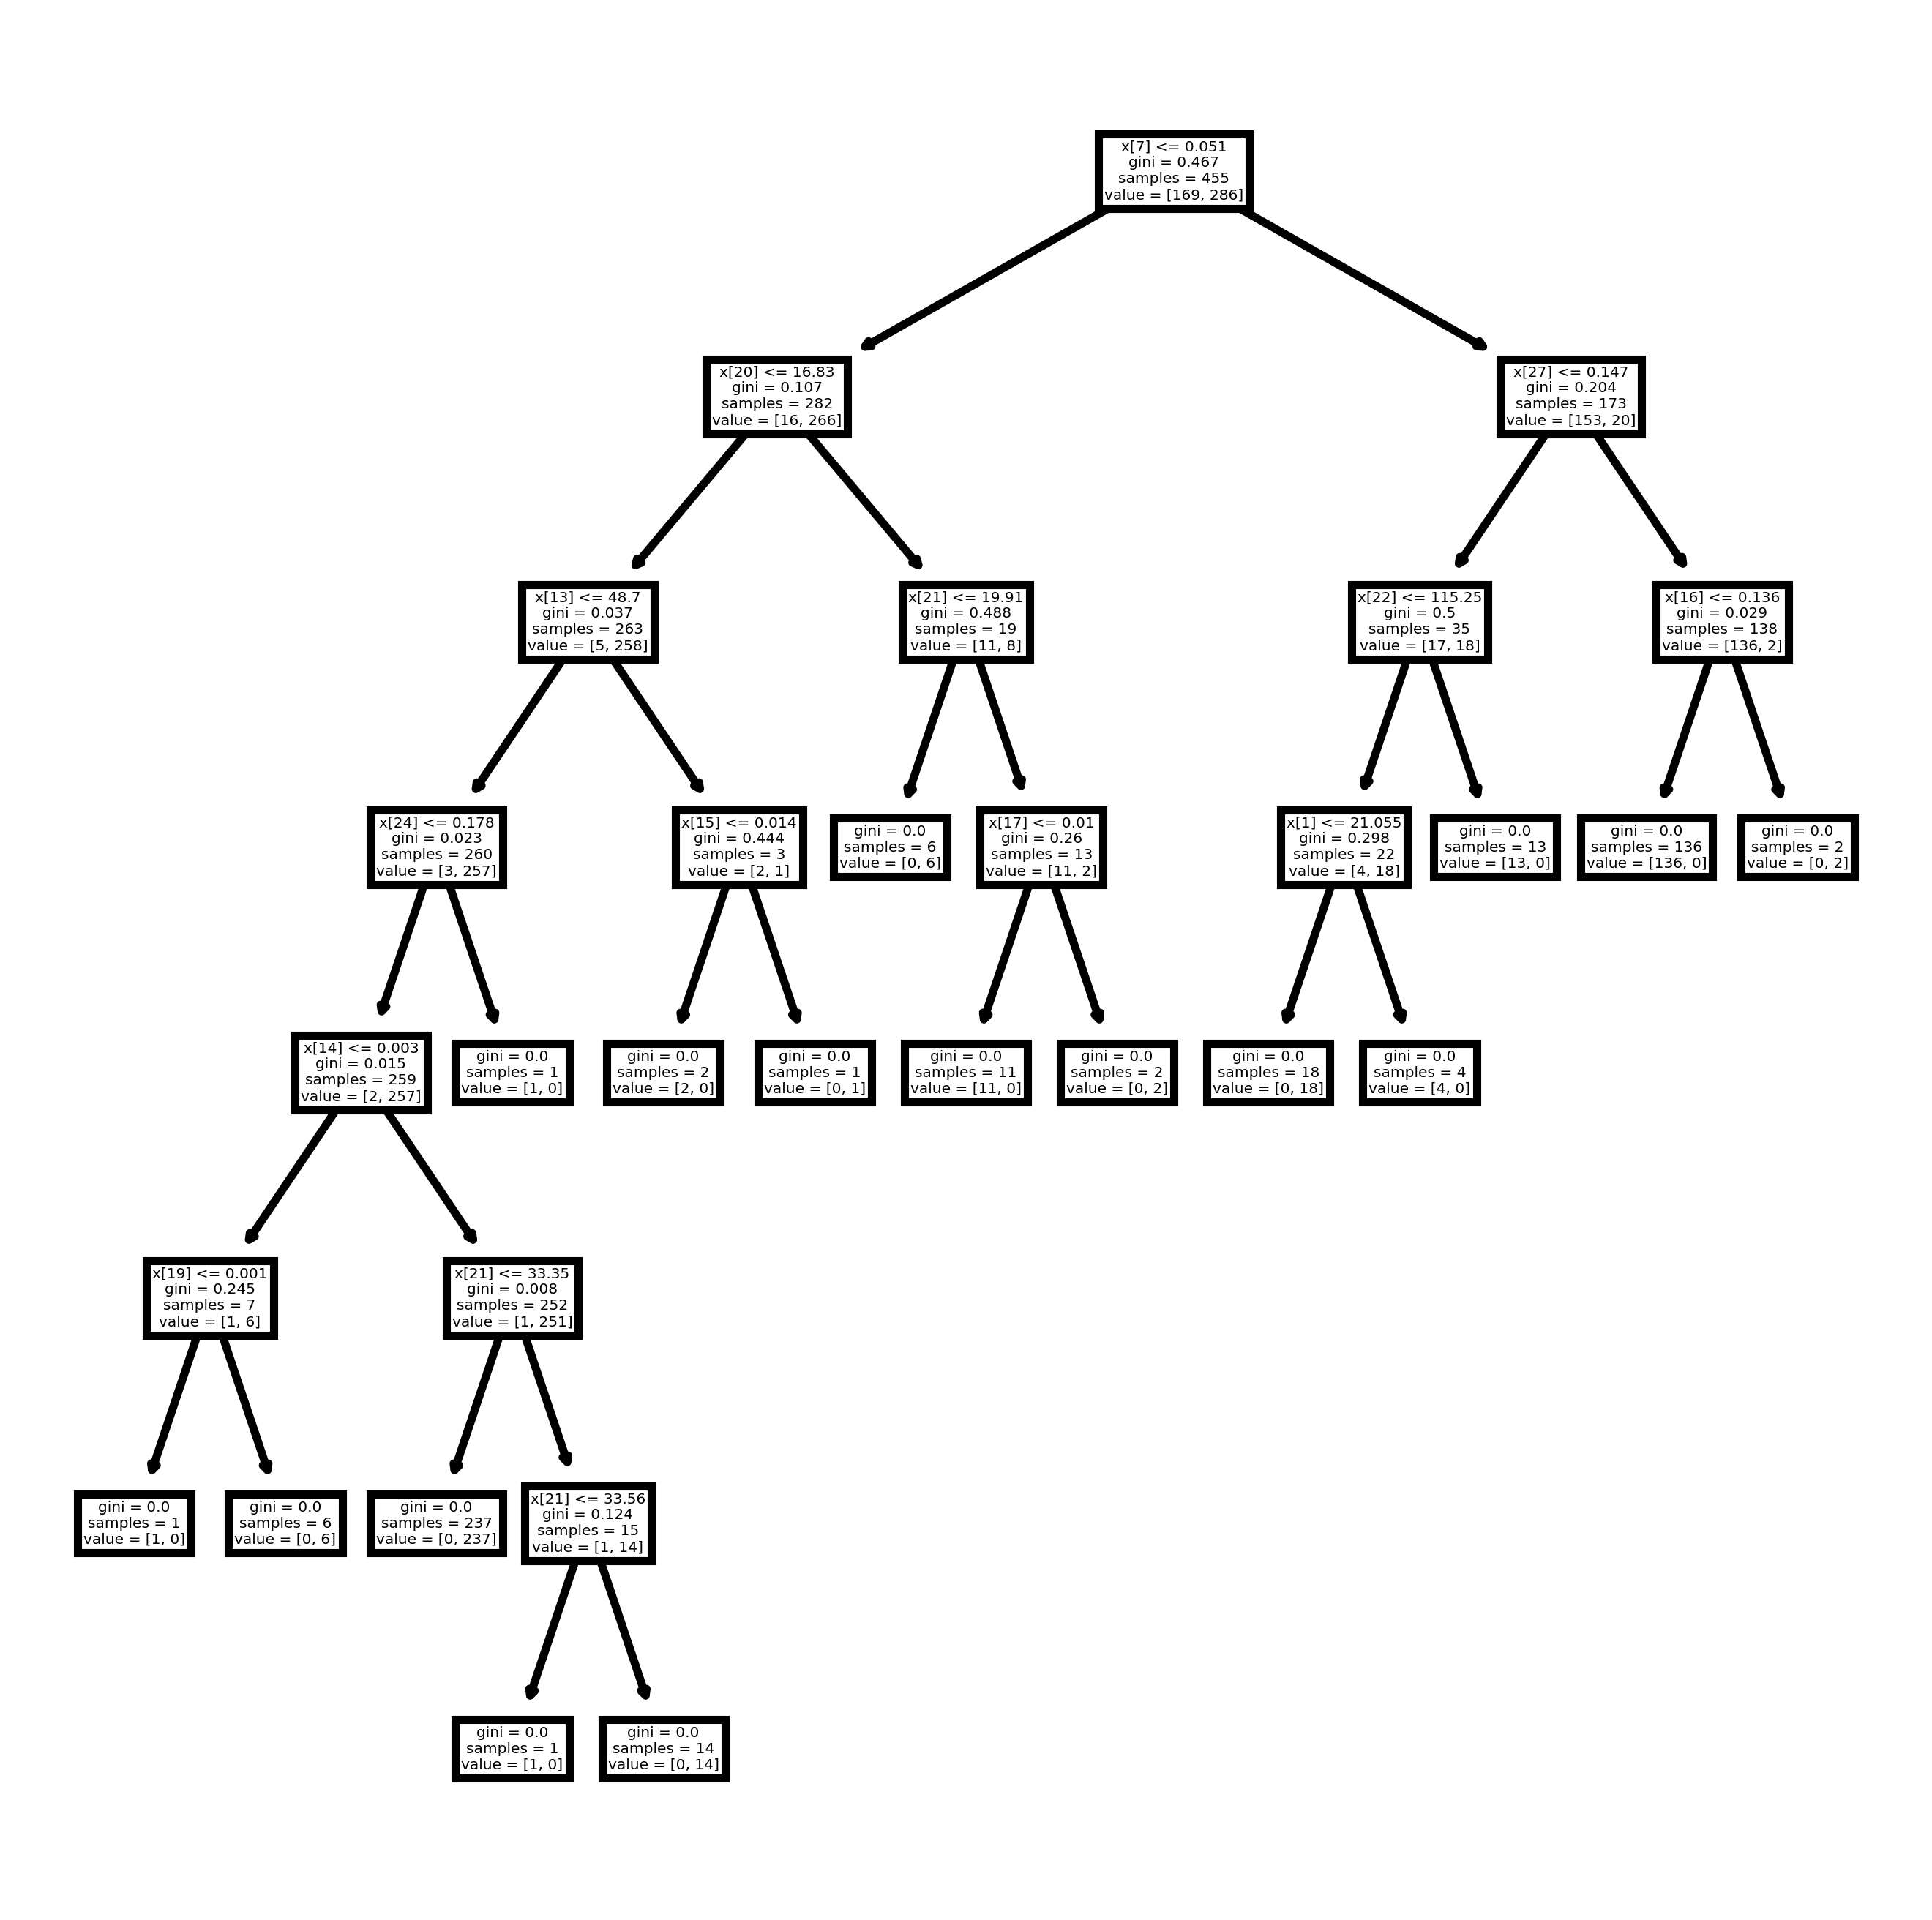

In [80]:

import matplotlib.pyplot as plt
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(dt);


In [81]:
num_of_decisiontree = 10
decision_trees = []

for _ in range(num_of_decisiontree):
    index = np.random.choice(len(X_train), len(X_train), replace=True)
    X_sample = X_train[index]
    y_sample = y_train[index]
    
    decision_tree = DecisionTreeClassifier(random_state=42)
    decision_tree.fit(X_sample, y_sample)
    decision_trees.append(decision_tree)

In [82]:
from scipy.stats import mode
predictions = []
for tree in decision_trees:
    prediction = tree.predict(X_test)
    predictions.append(prediction)
final_pred = mode(predictions, axis=0)[0]

accuracy = accuracy_score(y_test, final_pred)
print("Bagging Accuracy:", accuracy)

Bagging Accuracy: 0.956140350877193


In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)



Random Forest Accuracy: 0.9649122807017544


# implementations on moon dataset

In [84]:
from sklearn.datasets import make_moons, make_classification
X, y = make_moons(n_samples=100, noise=0.3 , random_state=42 )

Text(0, 0.5, 'Feature 2')

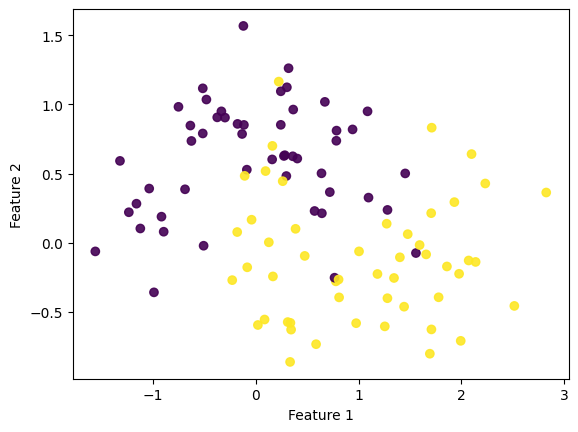

In [85]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.9, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

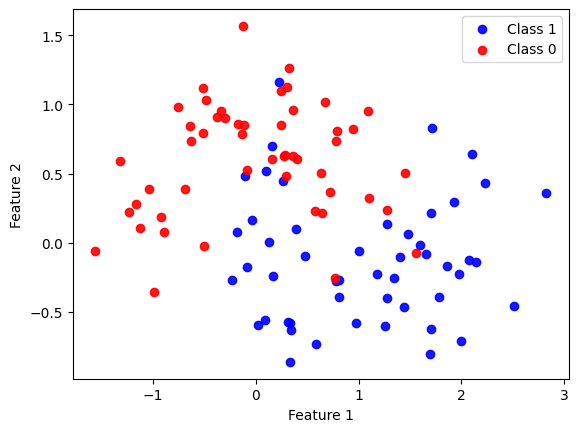

In [86]:
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c='b', label='Class 1', alpha=0.9)
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], c='r', label='Class 0', alpha=0.9)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend();

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

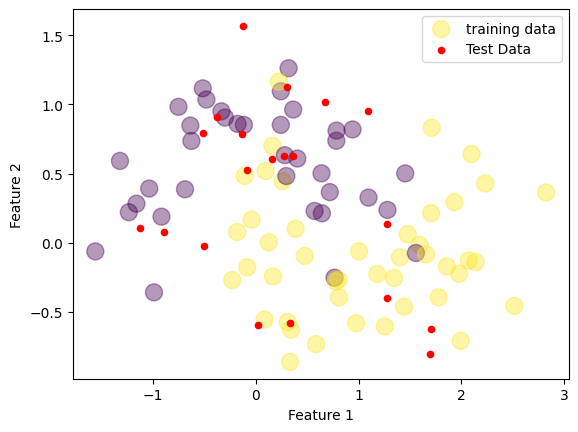

In [88]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=150,alpha=0.4,cmap='viridis',label='training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', s=20, alpha=1.0, label='Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend();

In [89]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.85


[Help: github](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/)

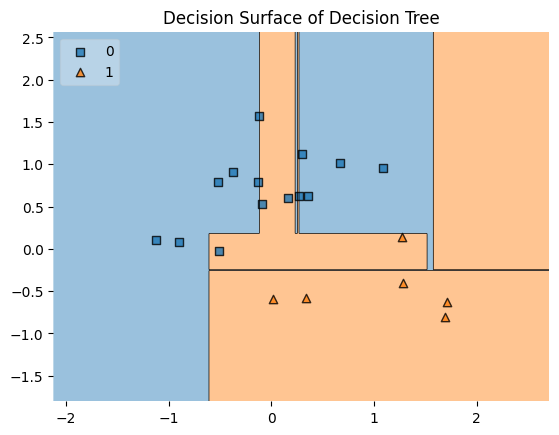

In [98]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X_test, y=y_test, clf=dt, legend=2)
plt.title('Decision Surface of Decision Tree');


[Help : Stackoverflow](https://stackoverflow.com/questions/50538626/plot-the-decision-surface-of-a-classification-decision-tree-with-3-features-on-a)

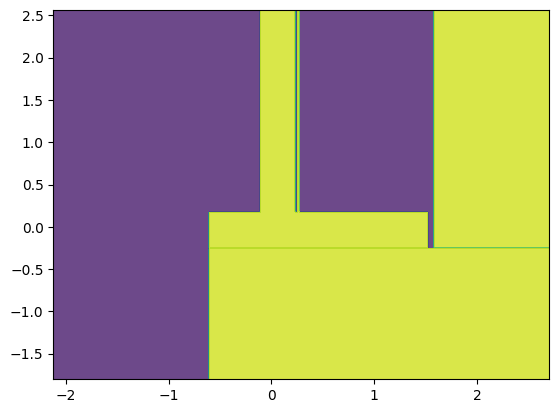

In [99]:
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis');

In [92]:
from scipy.stats import mode
num_of_decisiontree = 10
decision_trees = []

for _ in range(num_of_decisiontree):
    index = np.random.choice(len(X_train), len(X_train), replace=True)
    X_sample = X_train[index]
    y_sample = y_train[index]
    
    decision_tree = DecisionTreeClassifier(random_state=42)
    decision_tree.fit(X_sample, y_sample)
    decision_trees.append(decision_tree)
    
predictions = []
for tree in decision_trees:
    prediction = tree.predict(X_test)
    predictions.append(prediction)
final_pred = mode(predictions, axis=0)[0]

accuracy = accuracy_score(y_test, final_pred)
print("Bagging Accuracy:", accuracy)

Bagging Accuracy: 0.85


Plot  indivisual decision tree of bagging

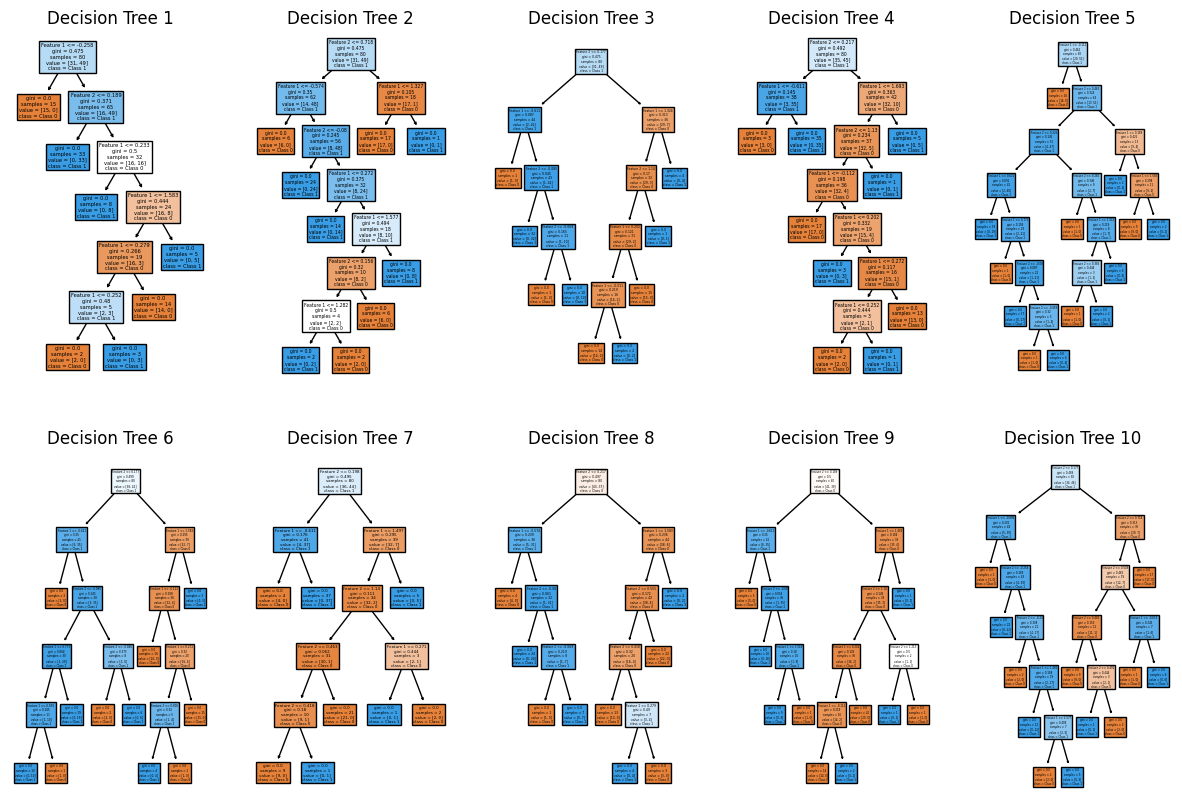

In [96]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
for i, tree in enumerate(decision_trees):
    plt.subplot(2, 5, i+1)
    plot_tree(tree, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
    plt.title('Decision Tree {}'.format(i+1))
plt.show()

Visualize the decision surface of each decision tree of bagging

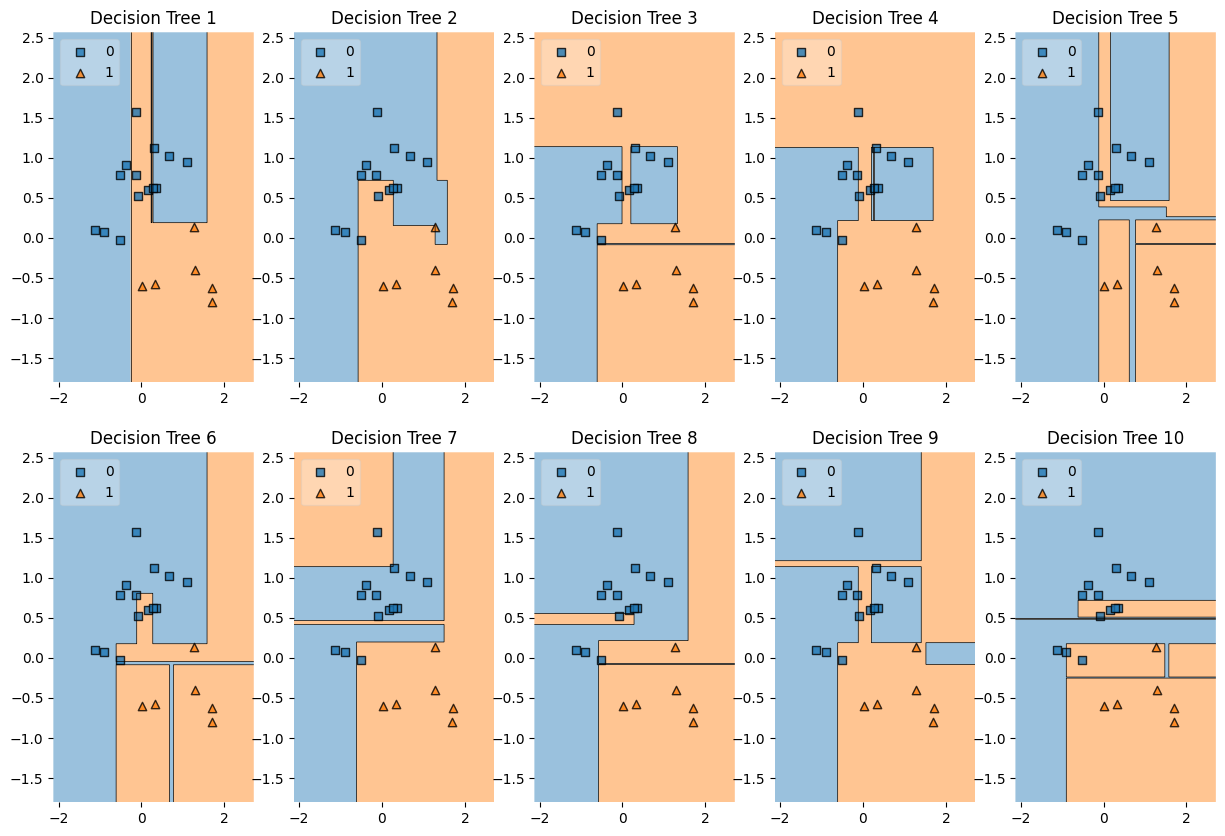

In [100]:
plt.figure(figsize=(15, 10))
for i, tree in enumerate(decision_trees):
    plt.subplot(2, 5, i+1)
    plot_decision_regions(X=X_test, y=y_test, clf=tree, legend=2)
    plt.title('Decision Tree {}'.format(i+1))
plt.show()